# CBAM Risk Analysis: East Asia & Pacific

## Carbon Border Adjustment Mechanism Impact Assessment

This notebook analyzes the vulnerability of East Asian and Pacific countries to the EU's Carbon Border Adjustment Mechanism (CBAM). The analysis combines multiple dimensions:

- **Exposure**: CBAM exports relative to GDP and total exports
- **Vulnerability**: Carbon intensity of electricity mix
- **Adaptive Capacity**: Statistical capacity and innovation capability
- **Economic Flexibility**: Trade elasticity

---

## 1. Setup and Configuration

In [4]:
# Set cwd to the root of the project
import os
os.chdir(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
print(os.getcwd())

c:\Users\ITLS104415\Desktop\Codebase\Dev


In [5]:
from pathlib import Path

# Import custom modules
from src.data_loader import DataLoader
from src.data_processing import DataProcessor
from src.visualization import Visualizer
from src.analysis import RiskAnalyzer
from src.config import RESULTS_DIR

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✓ All modules imported successfully")

✓ All modules imported successfully


## 2. Load Data

Load all required datasets using the DataLoader class.

In [6]:
# Initialize data loader
loader = DataLoader()

# Load all datasets
print("Loading datasets...\n")
raw_data = loader.load_all()

print(f"\n✓ Loaded {len(raw_data)} datasets successfully")
print("\nDataset shapes:")
for name, df in raw_data.items():
    print(f"  {name:20s}: {df.shape}")

Loading datasets...


✓ Loaded 8 datasets successfully

Dataset shapes:
  cbam_exports        : (11, 48)
  gdp                 : (18, 3)
  total_exports       : (11, 48)
  carbon_intensity    : (11, 3)
  spi                 : (11, 5)
  patents             : (11, 31)
  population          : (11, 5)
  trade_elasticity    : (11, 2)


## 3. Process Data

Clean, transform, and prepare all datasets for analysis.

In [7]:
# Initialize processor

processor = DataProcessor()

processed_data = {
    'cbam_exports': processor.prepare_cbam_exports(raw_data['cbam_exports']),
    'total_exports': processor.prepare_total_exports(raw_data['total_exports']),
    'gdp': raw_data['gdp'],
    'carbon_intensity': processor.prepare_carbon_intensity(raw_data['carbon_intensity']),
    'spi': processor.prepare_spi(raw_data['spi']),
    'patents': processor.prepare_patents(raw_data['patents']),
    'population': processor.prepare_population(raw_data['population']),
    'trade_elasticity': processor.prepare_trade_elasticity(raw_data['trade_elasticity'])
}

print("\n✓ All datasets processed successfully")


✓ All datasets processed successfully


## 4. Exploratory Data Analysis

### 4.1 CBAM Exports Analysis

Top 10 CBAM Exporters to EU (2019):
   ReporterISO  CBAM Value (millions)
9          CHN              6747.2491
3          KOR              3310.2217
0          JPN               578.2141
4          MYS               561.6956
10         IDN               462.0411
1          VNM               439.8416
5          THA               157.0272
8          SGP                66.9925
6          AUS                57.9174
2          NZL                45.5068


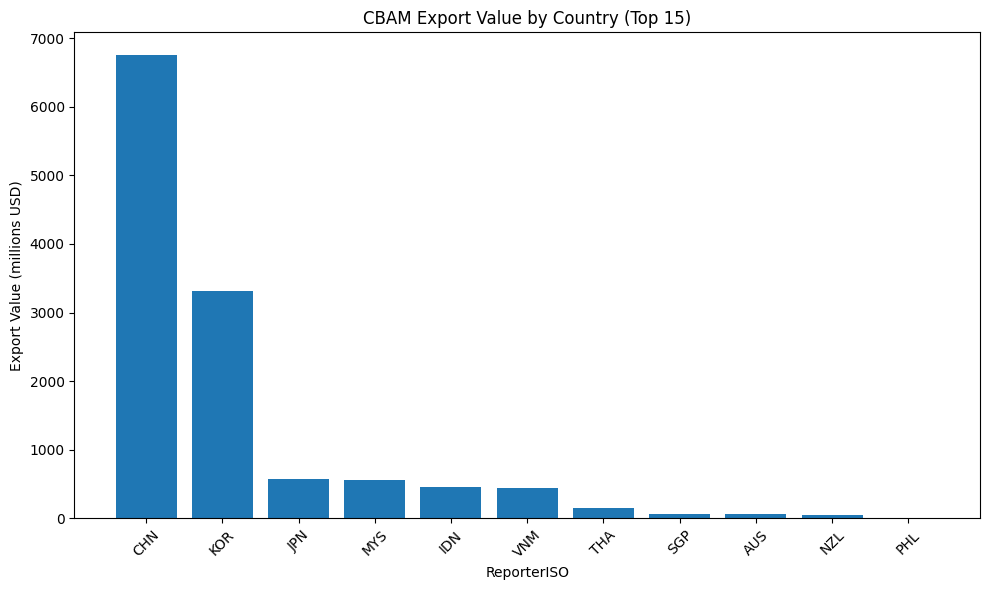

In [8]:
# Initialize visualizer
viz = Visualizer()

# Display top CBAM exporters
print("Top 10 CBAM Exporters to EU (2019):")
print(processed_data['cbam_exports'][['ReporterISO', 'CBAM Value (millions)']].head(10))

# Visualize
viz.create_bar_chart(
    processed_data['cbam_exports'].head(15),
    x_col='ReporterISO',
    y_col='CBAM Value (millions)',
    title='CBAM Export Value by Country (Top 15)',
    ylabel='Export Value (millions USD)'
)
plt.show()

### 4.2 CBAM Exports as Proportion of GDP

CBAM Exports as % of GDP:
  ReporterISO  ExpCBAMperGDP
1         KOR         0.0020
3         MYS         0.0015
5         VNM         0.0013
0         CHN         0.0005
4         IDN         0.0004
6         THA         0.0003
9         NZL         0.0002
7         SGP         0.0002
2         JPN         0.0001
8         AUS         0.0000


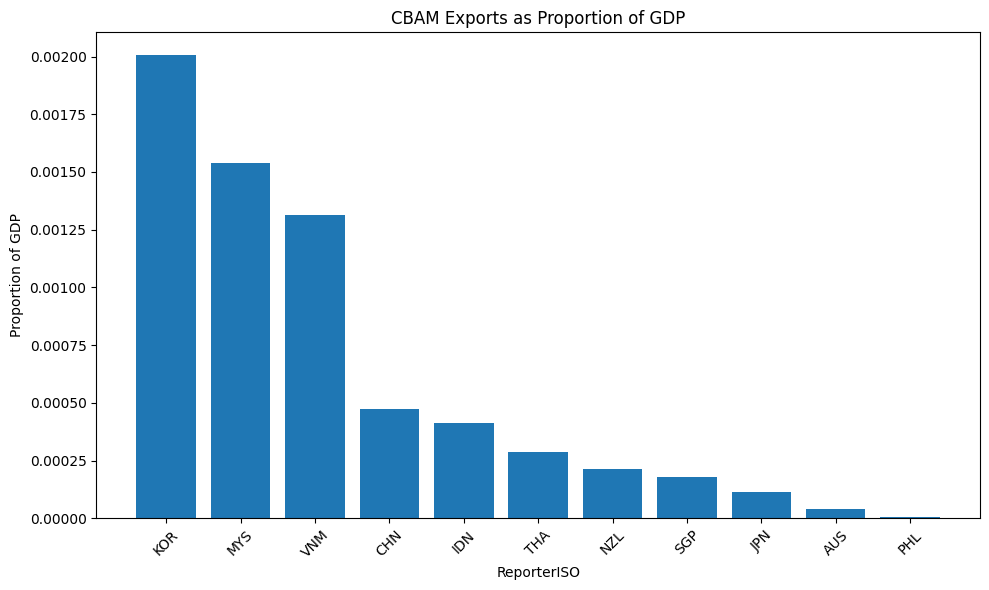

In [9]:
# Merge CBAM with GDP
cbam_gdp = processor.merge_cbam_gdp(
    processed_data['cbam_exports'],
    processed_data['gdp']
)

print("CBAM Exports as % of GDP:")
print(cbam_gdp[['ReporterISO', 'ExpCBAMperGDP']].head(10))

viz.create_bar_chart(
    cbam_gdp,
    x_col='ReporterISO',
    y_col='ExpCBAMperGDP',
    title='CBAM Exports as Proportion of GDP',
    ylabel='Proportion of GDP',
    sort_by='ExpCBAMperGDP',
    ascending=False
)
plt.show()

**Key Insight**: Countries where CBAM exports represent a higher proportion of GDP face greater economic exposure to carbon pricing mechanisms.

### 4.3 CBAM Exports as Proportion of Total Exports

CBAM Exports as % of Total Exports:
   ReporterISO  PctExpCBAM
3          KOR      0.0700
9          IDN      0.0347
4          MYS      0.0265
2          NZL      0.0210
8          CHN      0.0184
1          VNM      0.0123
0          JPN      0.0085
5          THA      0.0084
6          AUS      0.0075
10         SGP      0.0022


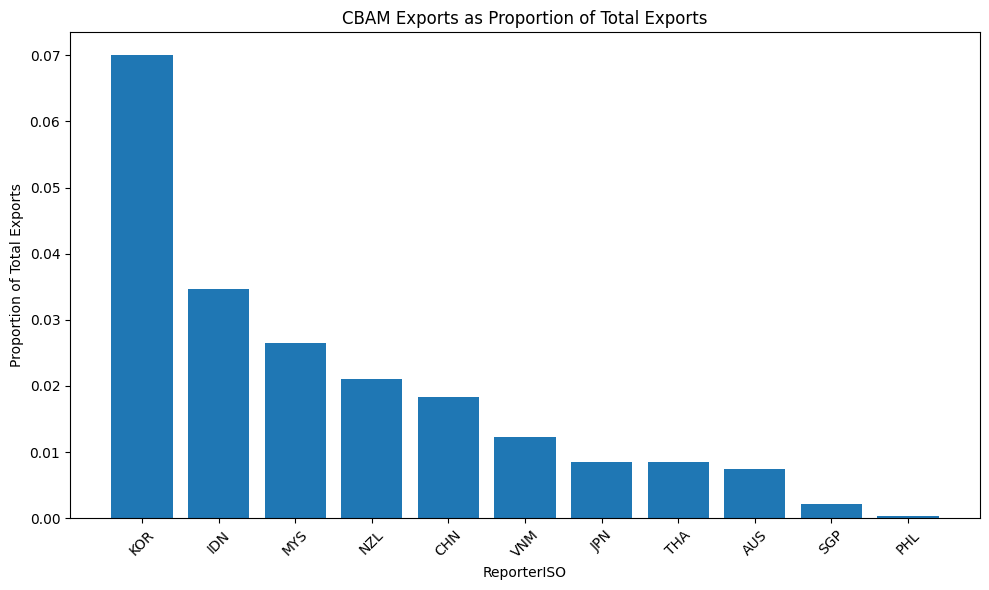

In [10]:
# Merge total exports with CBAM
cbam_total = processor.merge_cbam_total_exports(
    processed_data['total_exports'],
    processed_data['cbam_exports']
)

print("CBAM Exports as % of Total Exports:")
print(cbam_total[['ReporterISO', 'PctExpCBAM']].head(10))

viz.create_bar_chart(
    cbam_total,
    x_col='ReporterISO',
    y_col='PctExpCBAM',
    title='CBAM Exports as Proportion of Total Exports',
    ylabel='Proportion of Total Exports',
    sort_by='PctExpCBAM',
    ascending=False
)
plt.show()

### 4.4 Two-Dimensional Exposure Analysis

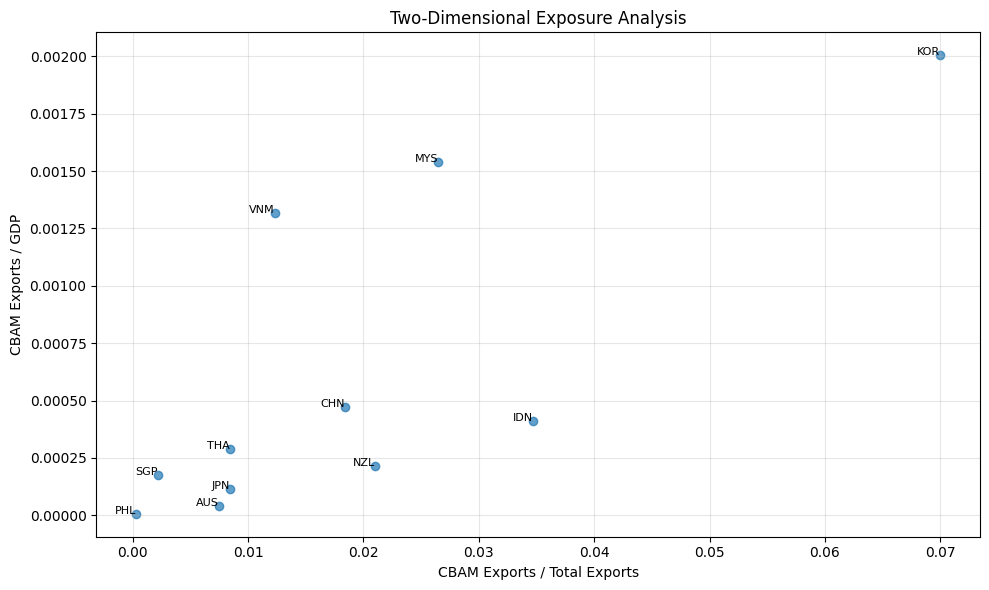

In [11]:
# Merge both exposure metrics
two_dim = pd.merge(cbam_total, cbam_gdp, on='ReporterISO', how='left')
two_dim = two_dim[['ReporterISO', 'PctExpCBAM', 'ExpCBAMperGDP']].dropna()

viz.create_scatter_plot(
    two_dim,
    x_col='PctExpCBAM',
    y_col='ExpCBAMperGDP',
    label_col='ReporterISO',
    title='Two-Dimensional Exposure Analysis',
    xlabel='CBAM Exports / Total Exports',
    ylabel='CBAM Exports / GDP'
)
plt.show()

### 4.5 Carbon Intensity Analysis

Carbon Intensity of Electricity (gCO2e/kWh):
   Country Code  Carbon_Intensity
7           IDN               619
5           PHL               582
8           MYS               544
10          CHN               531
0           AUS               503
4           THA               502
6           SGP               489
2           JPN               483
1           KOR               436
9           VNM               377


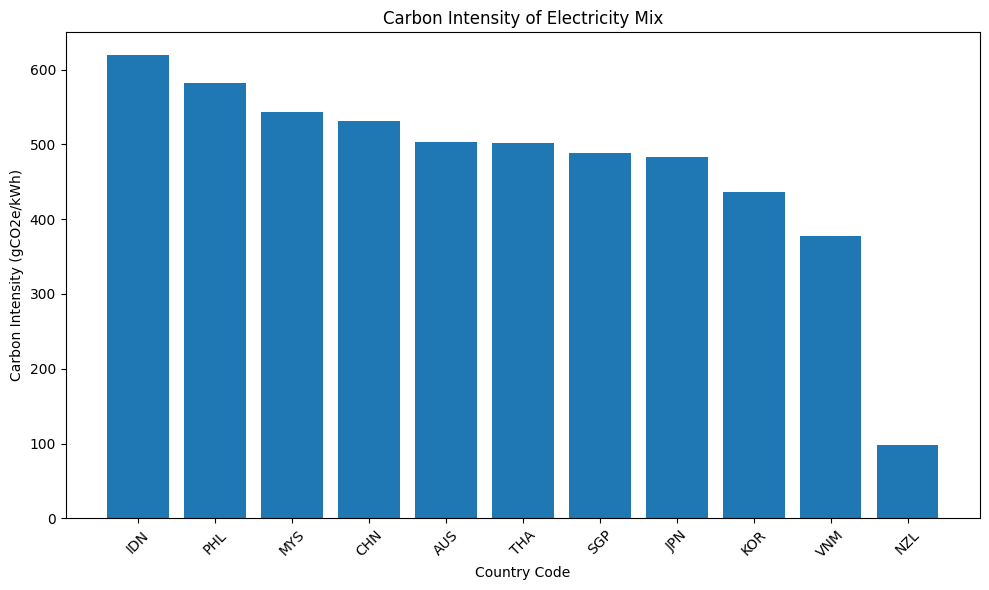

In [12]:
print("Carbon Intensity of Electricity (gCO2e/kWh):")
print(processed_data['carbon_intensity'][['Country Code', 'Carbon_Intensity']].head(10))

viz.create_bar_chart(
    processed_data['carbon_intensity'],
    x_col='Country Code',
    y_col='Carbon_Intensity',
    title='Carbon Intensity of Electricity Mix',
    ylabel='Carbon Intensity (gCO2e/kWh)',
    sort_by='Carbon_Intensity',
    ascending=False
)
plt.show()

**Key Insight**: Higher carbon intensity indicates greater vulnerability to carbon border adjustments.

## 5. Build Comprehensive Dataset

Merge all dimensions into a single comprehensive dataset.

In [ ]:
# Build comprehensive dataset
comprehensive_df = processor.build_comprehensive_dataset(processed_data)
comprehensive_df = comprehensive_df.drop(columns=['2020', '2021'], errors='ignore')
print("Comprehensive Dataset:")
print(f"Shape: {comprehensive_df.shape}")
print(f"\nColumns: {list(comprehensive_df.columns)}")
print(f"\nSample data:")
print(comprehensive_df[['Country Name', 'ExpCBAMperGDP', 'PctExpCBAM', 
                        'Carbon_Intensity', 'SPI_Score', 'PatPerCap', 'Trade_Elast']].head())

Comprehensive Dataset:
Shape: (11, 8)

Columns: ['Country Name', 'Country Code', 'Carbon_Intensity', 'PctExpCBAM', 'ExpCBAMperGDP', 'SPI_Score', 'PatPerCap', 'Trade_Elast']

Sample data:
  Country Name  ExpCBAMperGDP  PctExpCBAM  Carbon_Intensity  SPI_Score  \
0    Indonesia         0.0004      0.0347               619    72.2025   
1  Philippines         0.0000      0.0003               582    75.7233   
2     Malaysia         0.0015      0.0265               544    71.0504   
3        China         0.0005      0.0184               531    58.2183   
4    Australia         0.0000      0.0075               503    88.2417   

   PatPerCap  Trade_Elast  
0    49.8036       0.8890  
1    71.4825       0.7830  
2   461.7239       0.7360  
3   846.5083       0.5540  
4  2369.6679       1.3310  


## 6. Normalize and Prepare for Analysis

In [15]:
# Normalize columns for analysis
analysis_df = processor.normalize_columns(comprehensive_df)

# Create complementary scores (lower values = worse, so we invert)
analysis_df = processor.create_complementary_scores(
    analysis_df,
    columns=['SPI_Score', 'PatPerCap']
)

# Drop original columns, keep complementary
analysis_df = analysis_df.drop(columns=['SPI_Score', 'PatPerCap'], errors='ignore')

print("Normalized dataset ready for risk analysis")
print(f"Shape: {analysis_df.shape}")
print(f"\nNormalized columns sample:")
print(analysis_df[['Country Name', 'ExpCBAMperGDP', 'Carbon_Intensity', 
                   'SPI_Score_Compl', 'PatPerCap_Compl']].head())

Normalized dataset ready for risk analysis
Shape: (11, 8)

Normalized columns sample:
  Country Name  ExpCBAMperGDP  Carbon_Intensity  SPI_Score_Compl  \
0    Indonesia         0.2033            1.0000           0.5349   
1  Philippines         0.0000            0.9290           0.4178   
2     Malaysia         0.7666            0.8560           0.5732   
3        China         0.2332            0.8311           1.0000   
4    Australia         0.0175            0.7774           0.0014   

   PatPerCap_Compl  
0           1.0000  
1           0.9971  
2           0.9440  
3           0.8916  
4           0.6845  


## 7. Risk Index Calculation

### 7.1 Baseline Risk Index

In [16]:
# Initialize risk analyzer
analyzer = RiskAnalyzer()

# Calculate baseline risk index
from src.config import WEIGHT_SCENARIOS

baseline_weights = WEIGHT_SCENARIOS['baseline']
print("Baseline weights:")
for component, weight in baseline_weights.items():
    print(f"  {component:20s}: {weight:.2%}")

# Calculate weighted index
analysis_df = analyzer.calculate_weighted_index(
    analysis_df,
    baseline_weights,
    index_name='CBAM_Risk_Index'
)

# Rank countries
results_df = analyzer.rank_countries(
    analysis_df,
    index_col='CBAM_Risk_Index',
    country_col='Country Name'
)

print("\n" + "="*60)
print("CBAM RISK INDEX RANKINGS")
print("="*60)
print(results_df[['Rank', 'Country Name', 'CBAM_Risk_Index']].head(15))

Baseline weights:
  ExpCBAMperGDP       : 30.00%
  PctExpCBAM          : 14.00%
  Trade_Elast         : 14.00%
  Carbon_Intensity    : 14.00%
  SPI_Score_Compl     : 14.00%
  PatPerCap_Compl     : 14.00%

CBAM RISK INDEX RANKINGS
    Rank Country Name  CBAM_Risk_Index
2      1     Malaysia           0.6316
8      2        Korea           0.5852
9      3      Vietnam           0.5636
0      4    Indonesia           0.5124
3      5        China           0.4918
5      6     Thailand           0.3609
1      7  Philippines           0.3482
10     8  New Zealand           0.3024
6      9    Singapore           0.2996
4     10    Australia           0.2820
7     11        Japan           0.2522


### 7.2 Visualize Risk Index

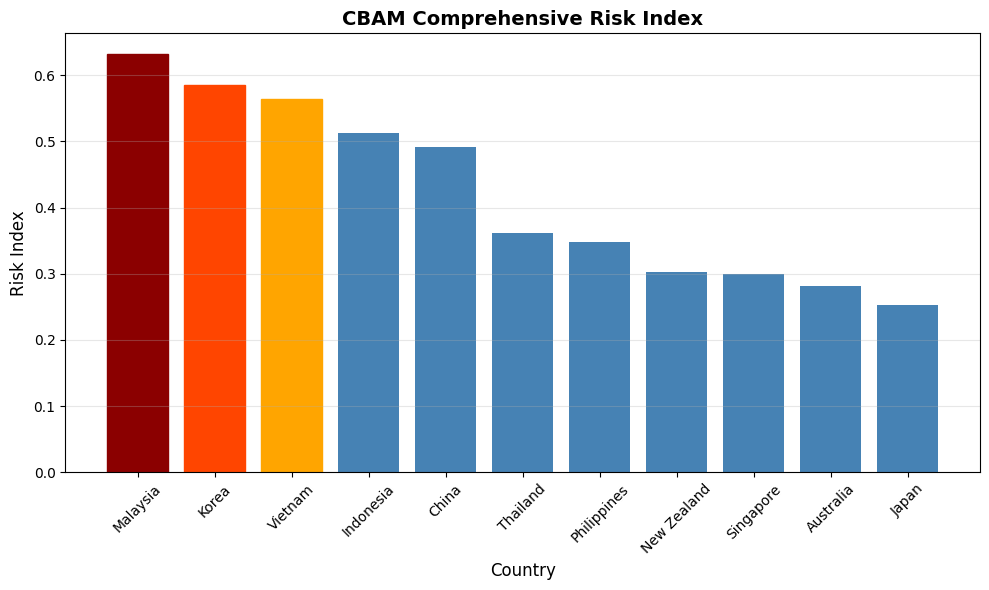

In [17]:
viz.create_risk_index_chart(
    results_df,
    country_col='Country Name',
    index_col='CBAM_Risk_Index',
    save_path=RESULTS_DIR / 'cbam_risk_index.png'
)
plt.show()

### 7.3 Summary Statistics

In [18]:
# Get summary statistics
stats = analyzer.get_summary_statistics(results_df, 'CBAM_Risk_Index')
print("\nRisk Index Statistics:")
print(stats)


Risk Index Statistics:
count   11.0000
mean     0.4209
std      0.1380
min      0.2522
25%      0.3010
50%      0.3609
75%      0.5380
max      0.6316
Name: CBAM_Risk_Index, dtype: float64


### 7.4 Risk Categorization

In [19]:
# Categorize countries by risk level
results_df = analyzer.categorize_risk(results_df, 'CBAM_Risk_Index')

print("\nCountries by Risk Category:")
print(results_df.groupby('RiskCategory')['Country Name'].apply(list))

print("\nRisk Category Distribution:")
print(results_df['RiskCategory'].value_counts())


Countries by Risk Category:
RiskCategory
High           [Malaysia, Korea, Vietnam, Indonesia]
Low       [New Zealand, Singapore, Australia, Japan]
Medium                [China, Thailand, Philippines]
Name: Country Name, dtype: object

Risk Category Distribution:
RiskCategory
High      4
Low       4
Medium    3
Name: count, dtype: int64


## 8. Sensitivity Analysis

Test how different weighting schemes affect the rankings.

In [21]:
# Run sensitivity analysis with all scenarios
sensitivity_df = analyzer.run_sensitivity_analysis(analysis_df)

# Display available scenarios
scenario_cols = [col for col in sensitivity_df.columns if col.startswith('Index_')]
print(f"Generated {len(scenario_cols)} scenarios:")
for col in scenario_cols:
    scenario_name = col.replace('Index_', '')
    print(f"  - {scenario_name}")

Generated 6 scenarios:
  - baseline
  - equal_weights
  - export_focused
  - no_innovation
  - no_trade_stat
  - no_trade_innovation


### 8.1 Compare Scenario Rankings

In [22]:
# Compare top countries across scenarios
comparison = analyzer.compare_scenarios(
    sensitivity_df,
    scenario_cols=scenario_cols,
    country_col='Country Name',
    top_n=10
)

print("\nTop 10 Countries - Ranking Comparison Across Scenarios:")
print(comparison)


Top 10 Countries - Ranking Comparison Across Scenarios:
   Country Name  Index_baseline_Rank  Index_equal_weights_Rank  \
2      Malaysia               1.0000                    1.0000   
8         Korea               2.0000                    5.0000   
0     Indonesia               4.0000                    2.0000   
9       Vietnam               3.0000                    3.0000   
3         China               5.0000                    4.0000   
5      Thailand               6.0000                    7.0000   
1   Philippines               7.0000                    6.0000   
6     Singapore               9.0000                    8.0000   
10  New Zealand               8.0000                    9.0000   
4     Australia              10.0000                   10.0000   

    Index_export_focused_Rank  Index_no_innovation_Rank  \
2                      2.0000                    2.0000   
8                      1.0000                    1.0000   
0                      3.0000          

### 8.2 Visualize Sensitivity Analysis

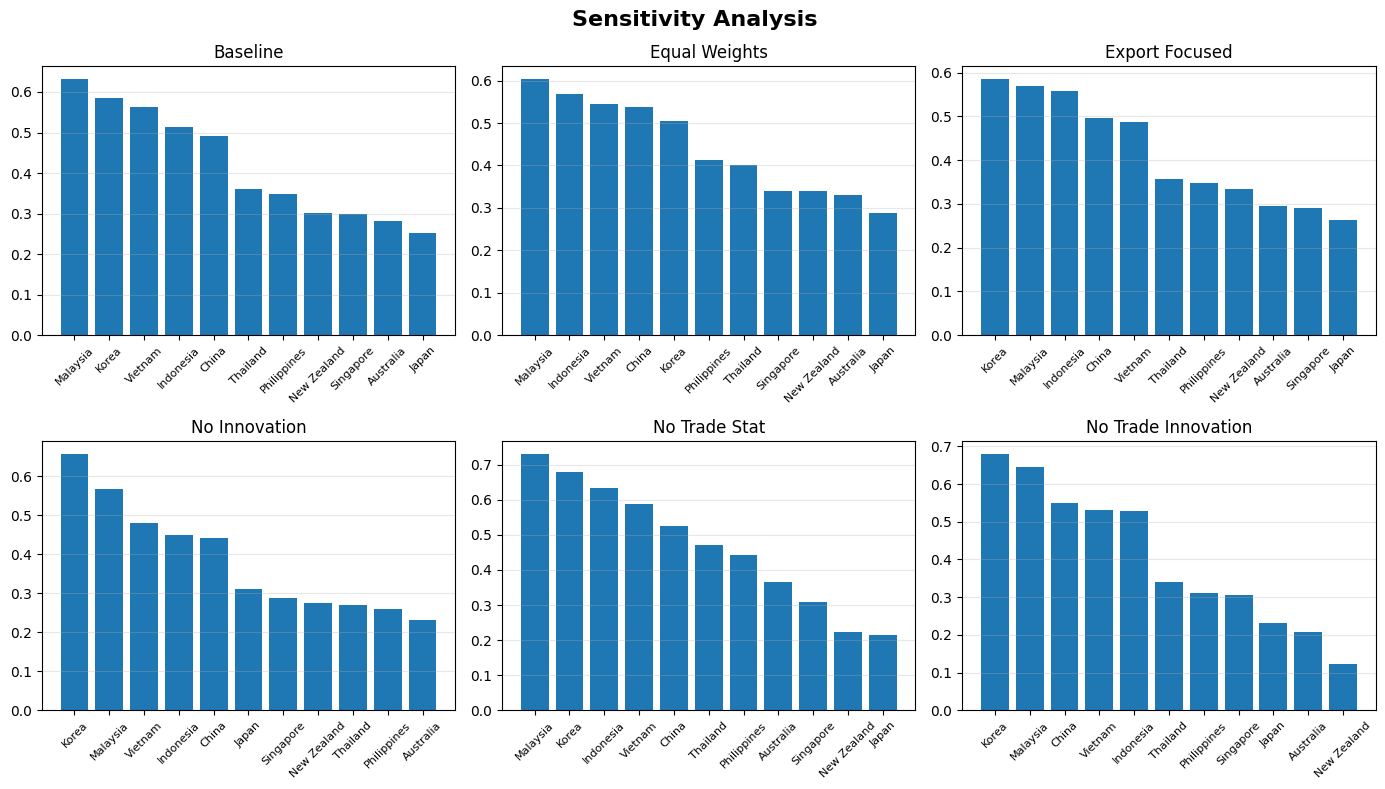

In [23]:
# Create scenario names for display
scenario_names = [col.replace('Index_', '').replace('_', ' ').title() 
                 for col in scenario_cols]

viz.create_sensitivity_comparison(
    sensitivity_df,
    country_col='Country Name',
    scenario_cols=scenario_cols,
    scenario_names=scenario_names,
    save_path=RESULTS_DIR / 'sensitivity_analysis.png'
)
plt.show()

## 9. Risk Driver Analysis

Identify the main risk factors for selected countries.

In [24]:
# Select top 5 highest risk countries
top_countries = results_df.nsmallest(5, 'Rank')['Country Name'].tolist()

print("Risk Drivers for Top 5 Highest Risk Countries:\n")
print("="*60)

for country in top_countries:
    print(f"\n{country}:")
    print("-" * 40)
    drivers = analyzer.identify_risk_drivers(
        analysis_df,
        country=country,
        component_cols=['ExpCBAMperGDP', 'PctExpCBAM', 'Carbon_Intensity',
                       'Trade_Elast', 'SPI_Score_Compl', 'PatPerCap_Compl']
    )
    for component, value in drivers.items():
        print(f"  {component:20s}: {value:.4f}")

Risk Drivers for Top 5 Highest Risk Countries:


Malaysia:
----------------------------------------
  PatPerCap_Compl     : 0.9440
  Carbon_Intensity    : 0.8560
  ExpCBAMperGDP       : 0.7666
  SPI_Score_Compl     : 0.5732
  PctExpCBAM          : 0.3755
  Trade_Elast         : 0.1202

Korea:
----------------------------------------
  ExpCBAMperGDP       : 1.0000
  PctExpCBAM          : 1.0000
  Carbon_Intensity    : 0.6488
  Trade_Elast         : 0.3886
  PatPerCap_Compl     : 0.0000
  SPI_Score_Compl     : 0.0000

Vietnam:
----------------------------------------
  PatPerCap_Compl     : 0.9964
  SPI_Score_Compl     : 0.7425
  ExpCBAMperGDP       : 0.6551
  Carbon_Intensity    : 0.5355
  Trade_Elast         : 0.1755
  PctExpCBAM          : 0.1721

Indonesia:
----------------------------------------
  PatPerCap_Compl     : 1.0000
  Carbon_Intensity    : 1.0000
  SPI_Score_Compl     : 0.5349
  PctExpCBAM          : 0.4941
  ExpCBAMperGDP       : 0.2033
  Trade_Elast         : 0.1950

Ch

## 10. Generate Comprehensive Report

In [25]:
# Generate comprehensive risk report
report = analyzer.generate_risk_report(
    results_df,
    index_col='CBAM_Risk_Index',
    country_col='Country Name',
    top_n=5,
    bottom_n=5
)

print("\n" + "="*60)
print("CBAM RISK ASSESSMENT - COMPREHENSIVE REPORT")
print("="*60)

print(f"\nTotal countries analyzed: {report['total_countries']}")
print(f"Mean risk index: {report['mean_risk']:.4f}")
print(f"Median risk index: {report['median_risk']:.4f}")

print("\n5 HIGHEST RISK COUNTRIES:")
print(report['highest_risk'].to_string(index=False))

print("\n5 LOWEST RISK COUNTRIES:")
print(report['lowest_risk'].to_string(index=False))


CBAM RISK ASSESSMENT - COMPREHENSIVE REPORT

Total countries analyzed: 11
Mean risk index: 0.4209
Median risk index: 0.3609

5 HIGHEST RISK COUNTRIES:
Country Name  CBAM_Risk_Index
    Malaysia           0.6316
       Korea           0.5852
     Vietnam           0.5636
   Indonesia           0.5124
       China           0.4918

5 LOWEST RISK COUNTRIES:
Country Name  CBAM_Risk_Index
 Philippines           0.3482
 New Zealand           0.3024
   Singapore           0.2996
   Australia           0.2820
       Japan           0.2522


## 11. Export Results

In [26]:
# Export main results
output_path = RESULTS_DIR / 'cbam_risk_analysis_results.xlsx'
analyzer.export_results(
    results_df[['Rank', 'Country Name', 'Country Code', 'CBAM_Risk_Index', 'RiskCategory',
               'ExpCBAMperGDP', 'PctExpCBAM', 'Carbon_Intensity', 
               'Trade_Elast', 'SPI_Score_Compl', 'PatPerCap_Compl']],
    output_path=output_path,
    sheet_name='Risk Analysis'
)

print(f"✓ Results exported to: {output_path}")

# Export sensitivity analysis
sensitivity_output = RESULTS_DIR / 'sensitivity_analysis_results.xlsx'
analyzer.export_results(
    sensitivity_df,
    output_path=sensitivity_output,
    sheet_name='Sensitivity Analysis'
)

print(f"✓ Sensitivity analysis exported to: {sensitivity_output}")

✓ Results exported to: c:\Users\ITLS104415\Desktop\Codebase\Dev\cbam-thesis\results\cbam_risk_analysis_results.xlsx
✓ Sensitivity analysis exported to: c:\Users\ITLS104415\Desktop\Codebase\Dev\cbam-thesis\results\sensitivity_analysis_results.xlsx
